## 1. '탐색적자료분석' 통계 화면 만들기
- 차이검정
- 상관분석
- 회기분석

## 2. 두 집단 간의 차이 검정 (T-test)
모집단의 분산이나 표준편차를 알지 못할 때 모집단을 대표하는 표본으로부터 추정된 분산이나 표준편차를 가지고 검정하는 방법으로
“두 모집단의 평균간의 차이는 없다”라는 귀무가설과 “두 모집단의 평균 간에 차이가 있다”라는 대립가설 중에 하나를 선택할 수 있도록
하는 통계적 검정방법이다.

- 귀무가설(H0) : 두 집단 간의 평균 차이는 없을 것이다.
- 대립가설(H1) : 두 집단 간의 평균 차이가 있을 것이다.

예를 들어, 유의 수준(α)을 0.05라고 가정할 때 t값이 커져서 (평균차이가 있을 가능성이 커져서) 기각역에 존재하여 유의확률(p값, pvalue)이 0.05보다 작으면 평균 차이가 유의미한 것으로 해석되어 귀무가설을 기각한다. 그 반대의 경우, 평균 차이가 유의미하지 않으므로 귀무가설을 수용한다.

# (LAB 1) 11월과 12월 아파트 평균 가격의 차이가 있는가? (차이 검정)

In [10]:
!pip install pingouin
from pingouin import ttest
import pandas as pd

seoul = pd.read_csv("seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([2, 3]))]

dec_df = apt_df[apt_df['month'] == 2]
nov_df = apt_df[apt_df['month'] == 3]

print('2월 아파트 평균 가격(만원) : ', dec_df['OBJ_AMT'].mean())
print('3월 아파트 평균 가격(만원) : ', nov_df['OBJ_AMT'].mean())

ttest(dec_df['OBJ_AMT'], nov_df['OBJ_AMT'], paired=False)

2월 아파트 평균 가격(만원) :  107010.86292962357
3월 아파트 평균 가격(만원) :  93951.16883116883


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.155249,2792.413094,two-sided,2.709830e-07,"[8092.4, 18026.99]",0.166668,2.167e+04,0.995301


**p-val : 2.709830e-07, p-val 값이 0.05보다 작은 값으로 2월과 3월의 평균 가격은 같지 않다.** 

=> 2월, 3월은 P-VAL 값이 0.05보다 작으므로 유의미한 값임

# (LAB 2) 2월과 3월 아파트 평균 가격의 차이가 있는가? (차이 검정) - 시각화

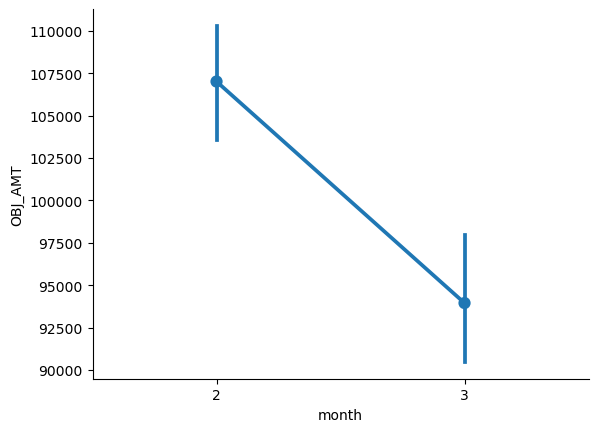

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.pointplot(x = 'month', y = 'OBJ_AMT', data = apt_df)
sns.despine()

plt.savefig('stat01.png', dpi=200)
plt.show()

**오차 막대는 95% 신뢰구간을 나타냄**


### 3. 상관 분석
- 변수가 서로 관련이 있는지 여부를 결정
- 두 변수가 연속형 변수 일 경우만 사용 가능
- 변수의 연관성 정도는 상관계수(r)로 표시, 피어슨 상관 계수
- r = +1 : 완벽한 양의 상관 관계
- r = -1 : 완벽한 음의 상관 관계
- r = 0 : 상관 관계가 없음


# (LAB 3) 상관 분석 - 건물 면적과 가격의 연관성이 있는가?
### (1) 산포도 그리기 (건물 면적과 가격과의 관련성)


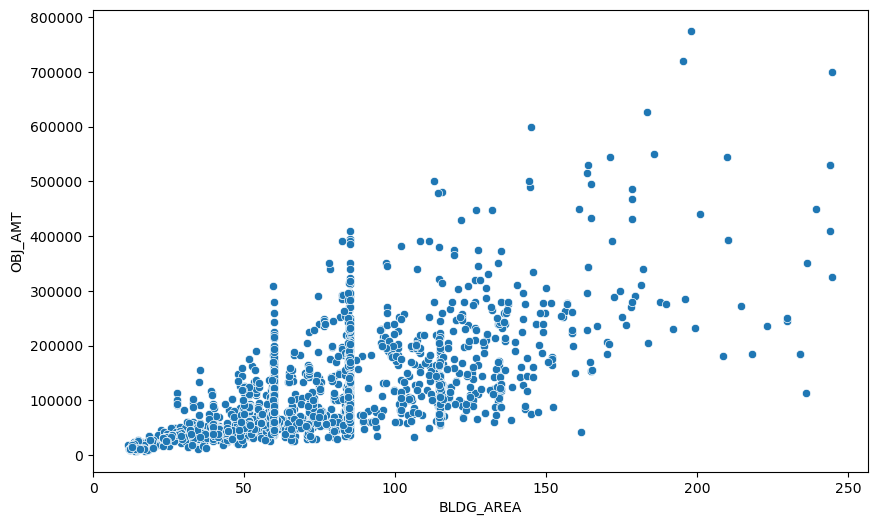

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

seoul = pd.read_csv("seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([11, 12]))]

corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df)

plt.savefig('stat02.png', dpi=200)
plt.show()


**산포도 차트를 그리고, 건물 면적과 가격과의 관련성을 시각적으로 확인한다.**


### (2) 상관 계수 구하기 (건물 면적과 가격과의 관련성)


In [9]:
import pingouin as pg
pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,3081,0.67,"[0.65, 0.69]",0.0,inf,1.0


### 상관계수 r = 0.731로 양의 상관관계를 가짐


## (3) 산포도에 상관 계수 표시하기 (건물 면적과 가격과의 관련성)

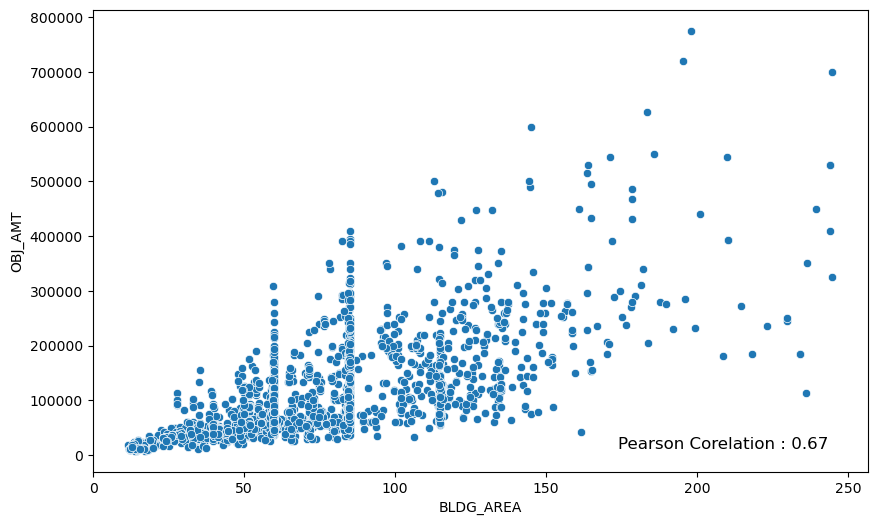

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg

seoul = pd.read_csv("seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([11, 12]))]

corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

# 상관게수 구하기
corr_coef = pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)['r'].values[0]

# 산포도 그리기
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df, ax = ax)
ax.text(0.95,0.05, f'Pearson Corelation : {corr_coef:.2f}',
        transform=ax.transAxes, ha='right', fontsize=12)

plt.savefig('stat03png', dpi=200)
plt.show()

### (4) 구별 건물 면적과 가격과의 관련성 알아보기


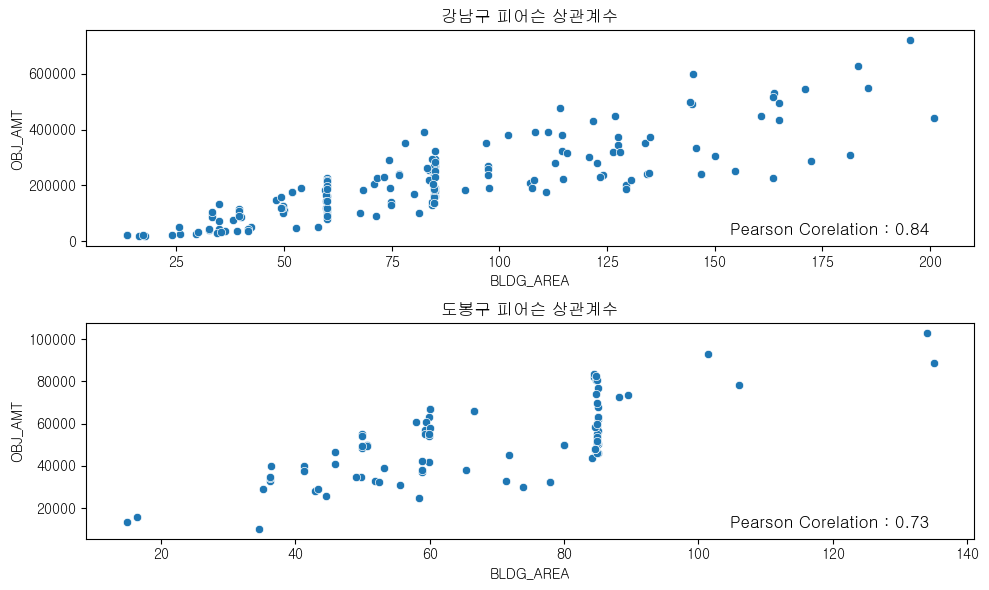

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg

from matplotlib import font_manager, rc 
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 읽어 오기
seoul = pd.read_csv("seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([11, 12]))]

corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

# 상관 관계를 알아 볼 구 목록
sgg_nm = ['강남구', '도봉구']

# 구별 산포도 그리기
fig, ax = plt.subplots(figsize=(10, 6), nrows = 2)
for i in range(len(sgg_nm)) :
     sgg_df = corr_df[corr_df['SGG_NM'] == sgg_nm[i]]

     # 상관계수 구하기
     corr_coef = pg.corr(sgg_df['BLDG_AREA'], sgg_df['OBJ_AMT']).round(3)['r'].values[0]

     # 산포도 그리기
     sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = sgg_df, ax = ax[i])
     ax[i].text(0.95,0.05, f'Pearson Corelation : {corr_coef:.2f}',
         transform=ax[i].transAxes, ha='right', fontsize=12)
     ax[i].set_title(f'{sgg_nm[i]} 피어슨 상관계수')

plt.tight_layout()
plt.savefig('stat04.png', dpi=200)
plt.show()

**강남구의 면적 대비 가격의 관련성이 0.92로 도봉구의 0.71보다 양의 상관 관게가 있음**